# Import libraries and load datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

In [2]:
path = r'C:\Users\Michael\Desktop\Career Foundry\03 Machine Learning\02 Real-World Applications of Machine Learning\Data Sets'

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
X = pd.read_csv(os.path.join(path,'DATASET weather_prediction_imputed.csv'), index_col = False)

In [5]:
X.head(10)

YEAR  MONTH  DAY  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  1960      1    1                  7            0.85           1.018   
1  1960      1    2                  6            0.84           1.018   
2  1960      1    3                  8            0.90           1.018   
3  1960      1    4                  3            0.92           1.018   
4  1960      1    5                  6            0.95           1.018   
5  1960      1    6                  1            0.78           1.018   
6  1960      1    7                  3            0.87           1.018   
7  1960      1    8                  8            0.95           1.018   
8  1960      1    9                  8            0.98           1.018   
9  1960      1   10                  3            0.74           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   
1                    0.36                 1.05             1.1   
2                    0.18                 0.30             0.0   
3                    0.58                 0.00             4.1   
4                    0.65                 0.14             5.4   
5                    0.76                 0.00             7.7   
6                    0.66                 0.00             5.4   
7                    0.19                 0.09             0.0   
8                    0.19                 0.56             0.0   
9                    0.38                 0.01             1.1   

   BASEL_temp_mean  ...  STOCKHOLM_temp_max  VALENTIA_cloud_cover  \
0              6.5  ...                 4.9                     5   
1              6.1  ...                 5.0                     7   
2              8.5  ...                 4.1                     7   
3              6.3  ...                 2.3                     7   
4              3.0  ...                 4.3                     3   
5              1.5  ...                 4.2                     5   
6             -0.4  ...                 1.0                     7   
7              0.9  ...                -1.6                     2   
8             -2.4  ...                -3.1                     5   
9             -6.9  ...                -1.0                     1   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.88             1.0003                       0.45   
1               0.91             1.0007                       0.25   
2               0.91             1.0096                       0.17   
3               0.86             1.0184                       0.13   
4               0.80             1.0328                       0.46   
5               0.76             1.0326                       0.33   
6               0.73             1.0230                       0.42   
7               0.72             1.0203                       0.50   
8               0.67             1.0243                       0.14   
9               0.66             1.0307                       0.49   

   VALENTIA_precipitation  VALENTIA_sunshine  VALENTIA_temp_mean  \
0                    0.34                4.7                 8.5   
1                    0.84                0.7                 8.9   
2                    0.08                0.1                10.5   
3                    0.98                0.0                 7.4   
4                    0.00                5.7                 5.7   
5                    0.00                0.9                 4.1   
6                    0.00                2.2                 7.9   
7                    0.00                6.2                 8.5   
8                    0.00                0.1                 6.8   
9                    0.00                6.4                 1.8   

   VALENTIA_temp_min  VALENTIA_temp_max  
0                6.0               10.9  
1                5.6               12.1  
2                8.1               12.9  
3            

In [6]:
tf.random.set_seed(42)

In [7]:
signals = [
    "cloud_cover",
    "humidity",
    "pressure",
    "global_radiation",
    "precipitation",
    "sunshine",
    "temp_mean",
    "temp_min",
    "temp_max"]

In [8]:
locations = [
    "BASEL",
    "BELGRADE",
    "BUDAPEST",
    "DEBILT",
    "DUSSELDORF",
    "HEATHROW",
    "KASSEL",
    "LJUBLJANA",
    "MAASTRICHT",
    "MADRID",
    "MUNCHENB",
    "OSLO",
    "SONNBLICK",
    "STOCKHOLM",
    "VALENTIA",
    ]

In [9]:
activities = {
    0: 'Unpleasant',
    1: 'Pleasant'
    }

In [10]:
y = pd.read_csv(os.path.join(path,'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [11]:
y.head()

YEAR  MONTH  DAY  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  1960      1    1                       0                          0   
1  1960      1    2                       0                          0   
2  1960      1    3                       0                          0   
3  1960      1    4                       0                          0   
4  1960      1    5                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

# Select a range of years
## 2010s

In [12]:
X_2010s = X[(X["YEAR"] > 2009) & (y["YEAR"] < 2020)]
y_2010s = y[(y["YEAR"] > 2009) & (y["YEAR"] < 2020)]

In [13]:
X_2010s

YEAR  MONTH  DAY  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
18263  2010      1    1                  8            0.93          0.9965   
18264  2010      1    2                  3            0.74          1.0193   
18265  2010      1    3                  3            0.75          1.0226   
18266  2010      1    4                  5            0.83          1.0169   
18267  2010      1    5                  7            0.78          1.0073   
...     ...    ...  ...                ...             ...             ...   
21910  2019     12   27                  8            0.92          1.0273   
21911  2019     12   28                  7            0.86          1.0380   
21912  2019     12   29                  6            0.93          1.0387   
21913  2019     12   30                  1            0.81          1.0354   
21914  2019     12   31                  5            0.87          1.0350   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
18263                    0.18                 0.56             0.0   
18264                    0.58                 0.00             5.2   
18265                    0.61                 0.00             6.3   
18266                    0.48                 0.00             3.7   
18267                    0.53                 0.04             4.4   
...                       ...                  ...             ...   
21910                    0.15                 0.52             0.1   
21911                    0.35                 0.00             1.3   
21912                    0.61                 0.00             4.9   
21913                    0.64                 0.00             6.5   
21914                    0.58                 0.00             3.5   

       BASEL_temp_mean  ...  STOCKHOLM_temp_max  VALENTIA_cloud_cover  \
18263              2.9  ...                -7.0                     1   
18264             -1.5  ...                -7.1                     1   
18265             -3.2  ...                -7.1                     4   
18266             -4.9  ...                -3.6                     2   
18267             -4.0  ...                -5.5                     4   
...                ...  ...                 ...                   ...   
21910              6.8  ...                 0.2                     5   
21911              3.7  ...                -1.0                     5   
21912             -0.8  ...                 5.8                     5   
21913              0.5  ...                 9.6                     5   
21914              0.4  ...                 8.5                     5   

       VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
18263               0.80             1.0121                       0.43   
18264               0.82             1.0196                       0.45   
18265               0.71             1.0196                       0.36   
18266               0.67             1.0219                       0.48   
18267               0.78             1.0117                       0.45   
...                  ...                ...                        ...   
21910               0.82             1.0142                       0.04   
21911               0.82             1.0142                       0.20   
21912               0.82             1.0142                       0.24   
21913               0.82             1.0142                       0.06   
21914               0.82             1.0142                       0.10   

       VALENTIA_precipitation  VALENTIA_sunshine  VALENTIA_temp_mean  \
18263                    0.00                6.0                 1.7   
18264                    0.00                6.0                 0.8   
18265                    0.41                1.6                 0.5   
18266                    0.51                6.5                 3.7   
18267                    0.09                4.7                 2.3   
...                       ...  

In [14]:
y_2010s

YEAR  MONTH  DAY  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18263  2010      1    1                       0                          0   
18264  2010      1    2                       0                          0   
18265  2010      1    3                       0                          0   
18266  2010      1    4                       0                          0   
18267  2010      1    5                       0                          0   
...     ...    ...  ...                     ...                        ...   
21910  2019     12   27                       0                          0   
21911  2019     12   28                       0                          0   
21912  2019     12   29                       0                          0   
21913  2019     12   30                       0                          0   
21914  2019     12   31                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18263                          0                        0   
18264                          0                        0   
18265                          0                        0   
18266                          0                        0   
18267                          0                        0   
...                          ...                      ...   
21910                          0                        0   
21911                          0                        0   
21912                          0                        0   
21913                          0                        0   
21914                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18263                            0                          0   
18264                            0                          0   
18265                            0                          0   
18266                            0                          0   
18267                            0                          0   
...                            ...                        ...   
21910                            0                          0   
21911                            0                          0   
21912                            0                          0   
21913                            0                          0   
21914                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18263                        0                           0   
18264                        0                           0   
18265                        0                           0   
18266                        0                           0   
18267                        0                           0   
...                        ...                         ...   
21910                        0                           0   
21911                        0                           0   
21912                        0                           0   
21913                        0                           0   
21914                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18263                            0                        0   
18264                            0                        0   
18265                            0                        0   
18266                            0                        0   
18267                            0                        0   
...                            ...                      ...   
21910                            0                        0   
21911                            0                        0   
21912                            0                        0   
21913                            0                        0   
21914                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weathe

# Create the test and train data
Then convert to array

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_2010s, y_2010s, test_size=0.3, random_state=42)

In [16]:
X_train.drop(columns=["YEAR", "MONTH", "DAY"], inplace=True)
X_test.drop(columns=["YEAR", "MONTH", "DAY"], inplace=True)
y_train.drop(columns=["YEAR", "MONTH", "DAY"], inplace=True)
y_test.drop(columns=["YEAR", "MONTH", "DAY"], inplace=True)

In [17]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2556, 135) (2556, 15)
(1096, 135) (1096, 15)


In [18]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Perform the random forest algorithm

In [19]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.5866788321167883


The accuracy of this algorithm is low compared to previously used algorithms.

In [21]:
act = ["Unpleasant", "Pleasant"]

# Plot some forests as examples

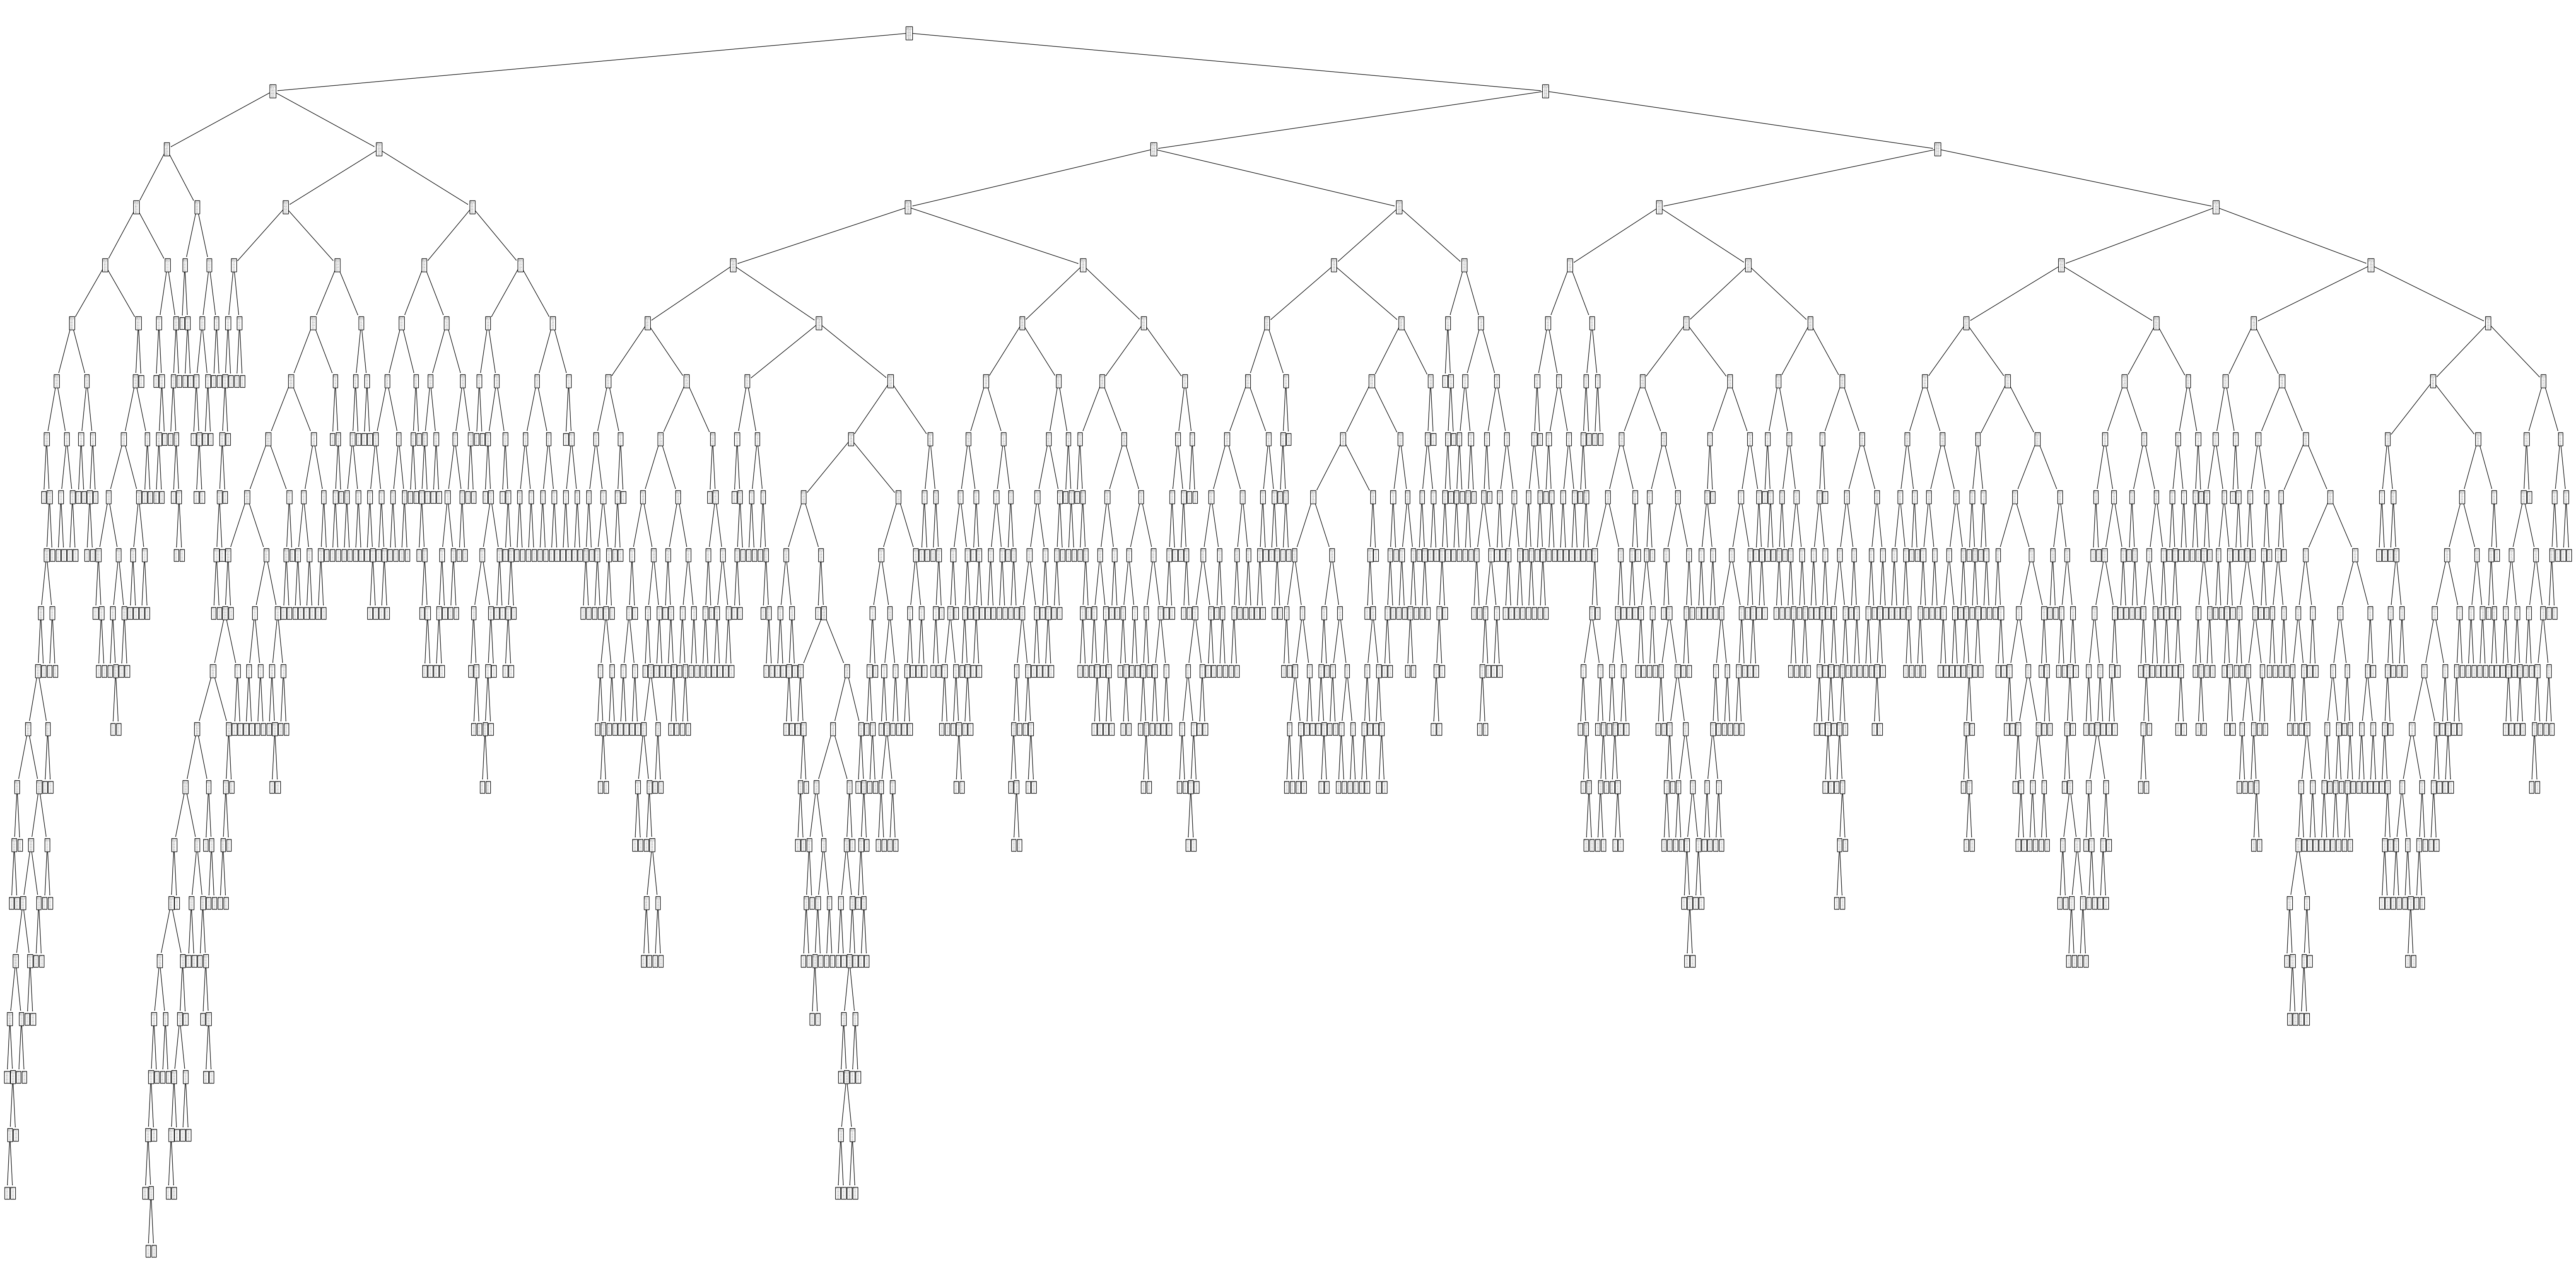

In [22]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[1], class_names=act);
#, feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True); max_depth = 4, 

In [23]:
save_path = r'C:\Users\Michael\Desktop\Career Foundry\03 Machine Learning\02 Real-World Applications of Machine Learning\2.03 Complex Machine Learning Models and Keras Part 2'

fig.savefig(f"{save_path}/decision_tree_weather2020-01.png")

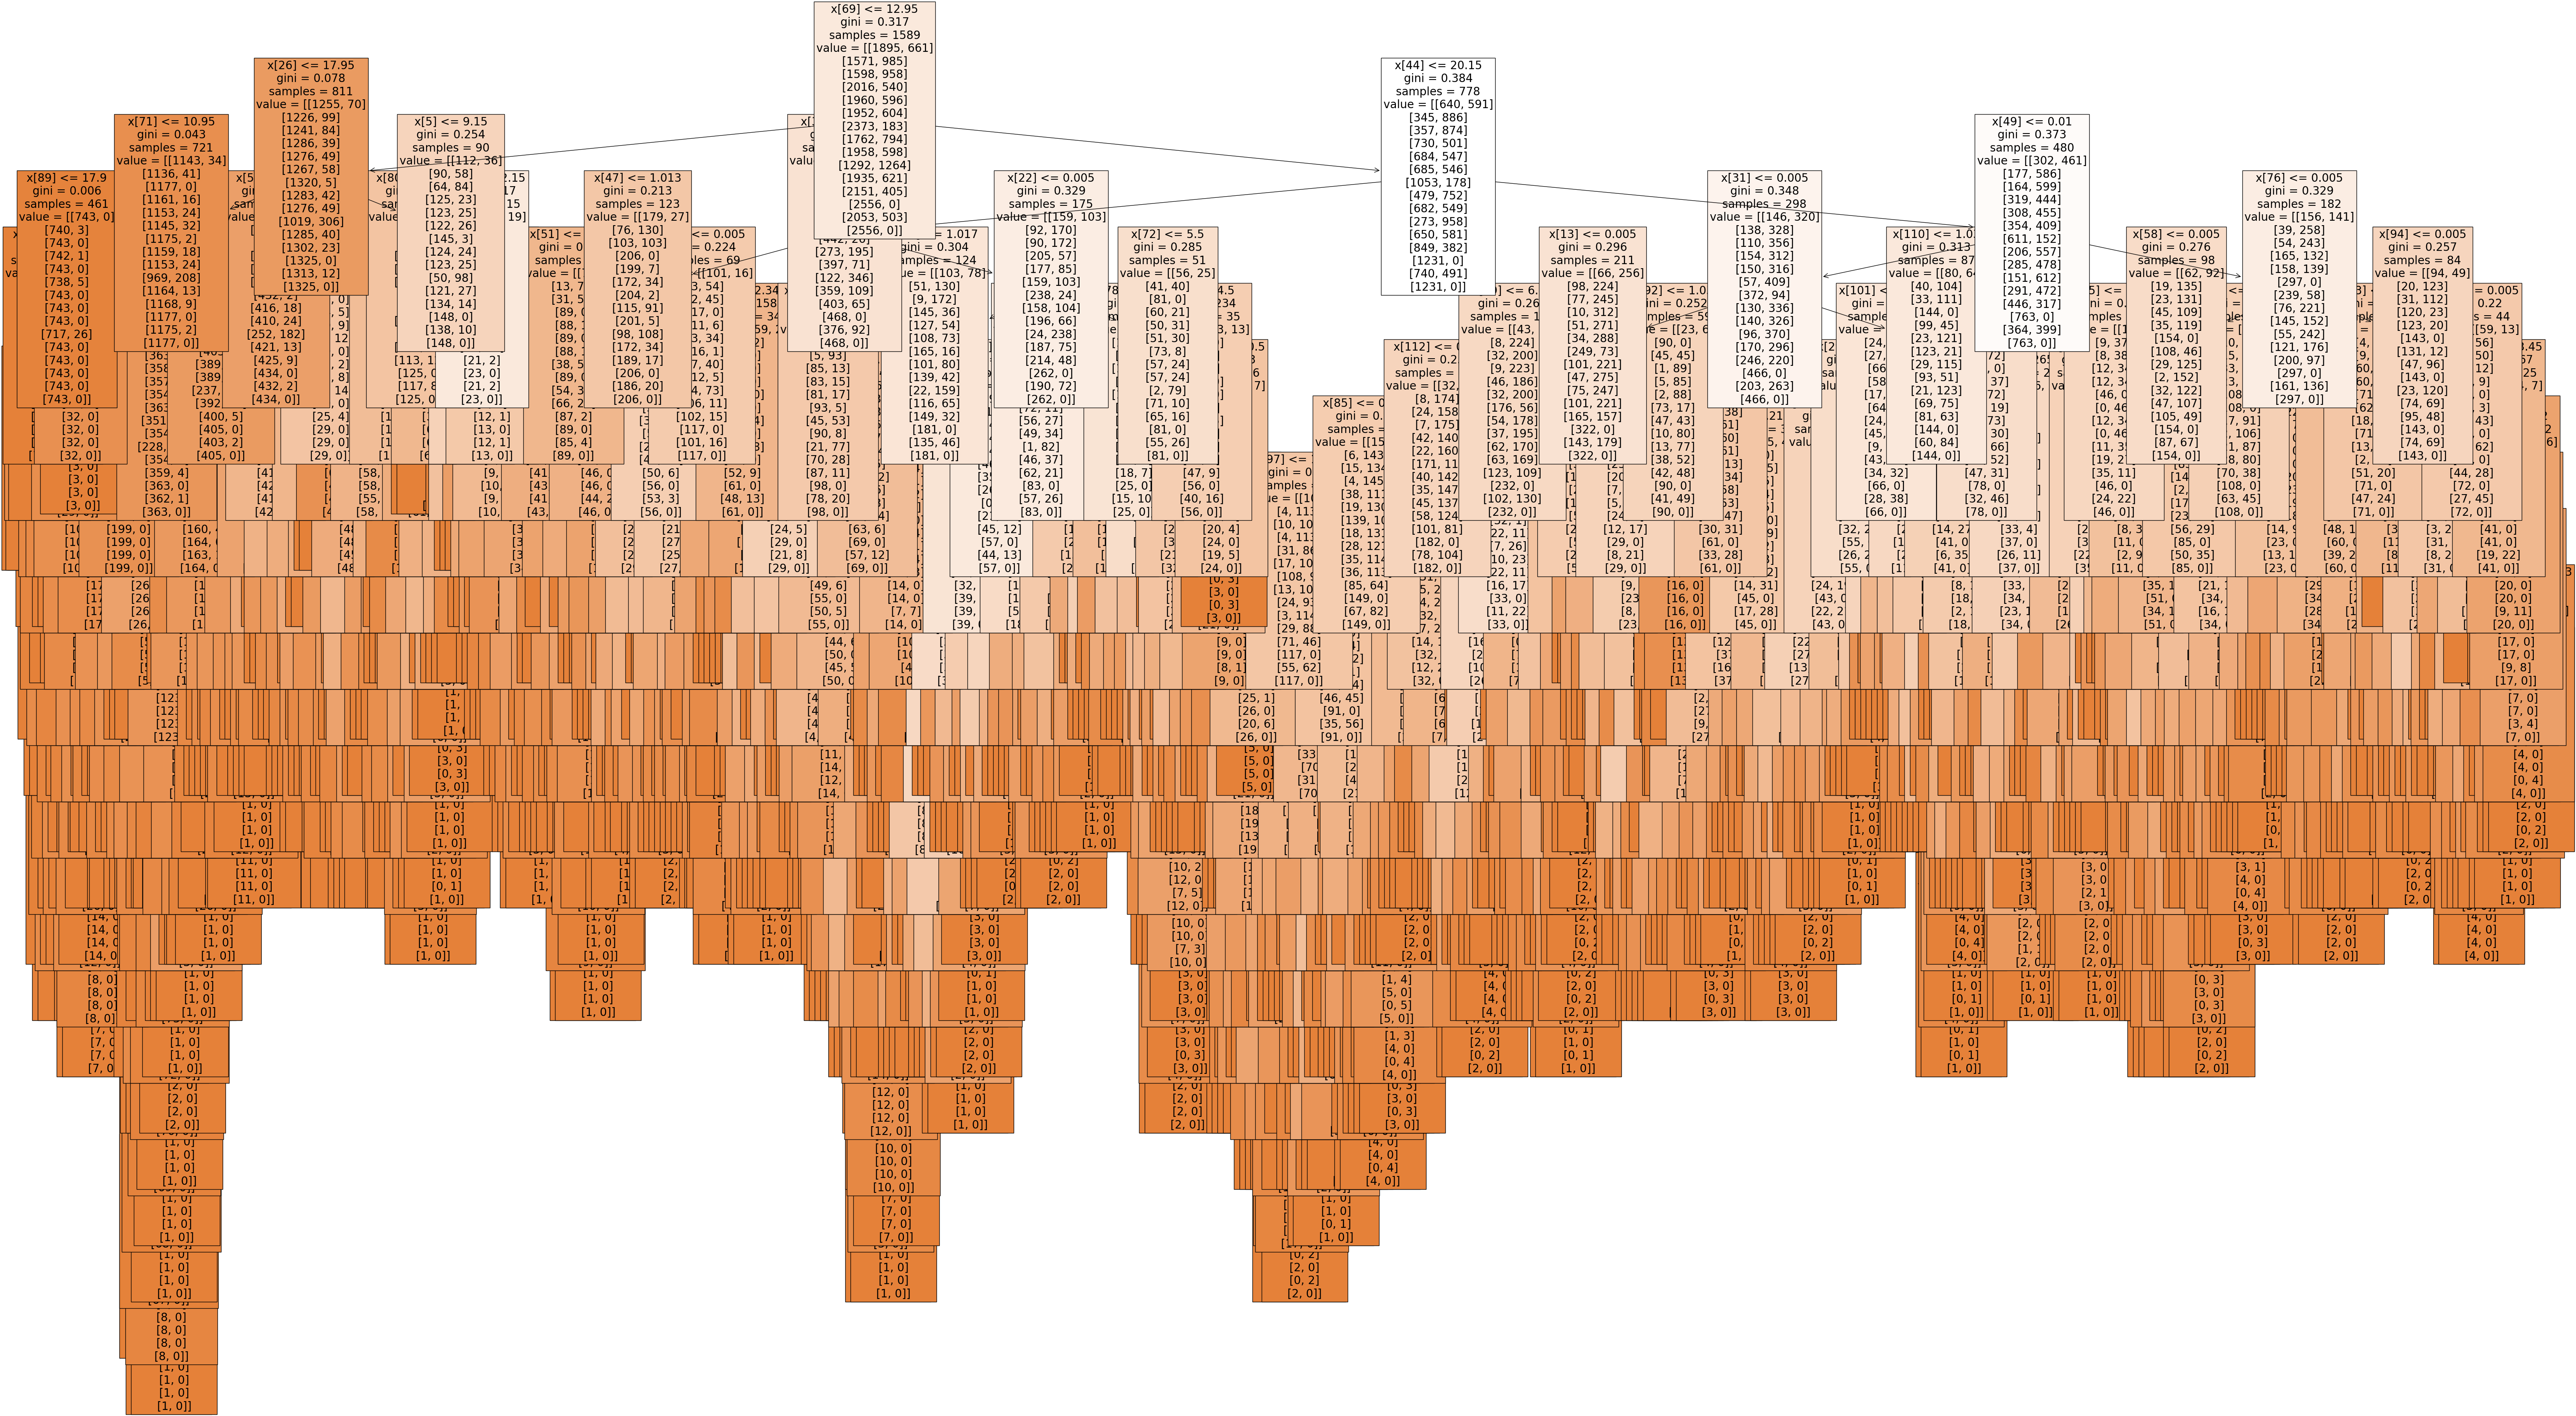

In [24]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[99], fontsize = 20, class_names=act, filled=True);

In [25]:
fig.savefig(f"{save_path}/decision_tree_weathe2020-02.png")

# Find the most relevant locations

In [26]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([4.00065203e-03, 3.68222273e-03, 3.25279285e-03, 3.65822520e-03,
       1.77712372e-02, 9.15470066e-03, 3.25111724e-02, 5.83892056e-03,
       3.36984051e-02, 4.28399006e-03, 3.47184042e-03, 4.28267331e-03,
       2.94053678e-03, 1.43382088e-02, 3.01792729e-03, 8.35691859e-03,
       3.81837634e-03, 6.35036160e-03, 3.78577350e-04, 0.00000000e+00,
       0.00000000e+00, 1.38243300e-03, 1.75186014e-02, 1.50878340e-03,
       1.20829811e-02, 3.86688766e-03, 1.59485410e-02, 3.08516190e-03,
       2.99015371e-03, 5.11958433e-03, 4.20035429e-03, 1.80289157e-02,
       4.34879037e-03, 8.19351831e-03, 3.27656949e-03, 4.24027843e-02,
       3.47116492e-03, 2.87114575e-03, 3.95300327e-03, 5.38017876e-03,
       1.90260432e-02, 6.34040762e-03, 2.64144445e-02, 4.96753240e-03,
       5.15728657e-02, 2.79887129e-03, 4.25470232e-03, 3.75818037e-03,
       4.66975516e-03, 9.61682225e-03, 4.33175416e-03, 1.44483840e-02,
       2.93170610e-03, 1.66148903e-02, 3.02475793e-03, 2.57633829e-03,
      

In [27]:
np.set_printoptions(threshold=1000)

In [28]:
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[4.00065203e-03, 3.68222273e-03, 3.25279285e-03, 3.65822520e-03,
         1.77712372e-02, 9.15470066e-03, 3.25111724e-02, 5.83892056e-03,
         3.36984051e-02],
        [4.28399006e-03, 3.47184042e-03, 4.28267331e-03, 2.94053678e-03,
         1.43382088e-02, 3.01792729e-03, 8.35691859e-03, 3.81837634e-03,
         6.35036160e-03],
        [3.78577350e-04, 0.00000000e+00, 0.00000000e+00, 1.38243300e-03,
         1.75186014e-02, 1.50878340e-03, 1.20829811e-02, 3.86688766e-03,
         1.59485410e-02],
        [3.08516190e-03, 2.99015371e-03, 5.11958433e-03, 4.20035429e-03,
         1.80289157e-02, 4.34879037e-03, 8.19351831e-03, 3.27656949e-03,
         4.24027843e-02],
        [3.47116492e-03, 2.87114575e-03, 3.95300327e-03, 5.38017876e-03,
         1.90260432e-02, 6.34040762e-03, 2.64144445e-02, 4.96753240e-03,
         5.15728657e-02],
        [2.79887129e-03, 4.25470232e-03, 3.75818037e-03, 4.66975516e-03,
         9.61682225e-03, 4.33175416e-03, 1.44483840e-02, 2.93170610

In [29]:
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.11356833, 0.05086083, 0.0526868 , 0.09164583, 0.12399679,
       0.06342507, 0.02923285, 0.08918521, 0.09025073, 0.05948159,
       0.08012358, 0.05753495, 0.0326733 , 0.06083304, 0.00450109])

In [30]:
important = pd.Series(sumarray, index = locations) #.sort_values(ascending = False)
important

BASEL         0.113568
BELGRADE      0.050861
BUDAPEST      0.052687
DEBILT        0.091646
DUSSELDORF    0.123997
HEATHROW      0.063425
KASSEL        0.029233
LJUBLJANA     0.089185
MAASTRICHT    0.090251
MADRID        0.059482
MUNCHENB      0.080124
OSLO          0.057535
SONNBLICK     0.032673
STOCKHOLM     0.060833
VALENTIA      0.004501
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


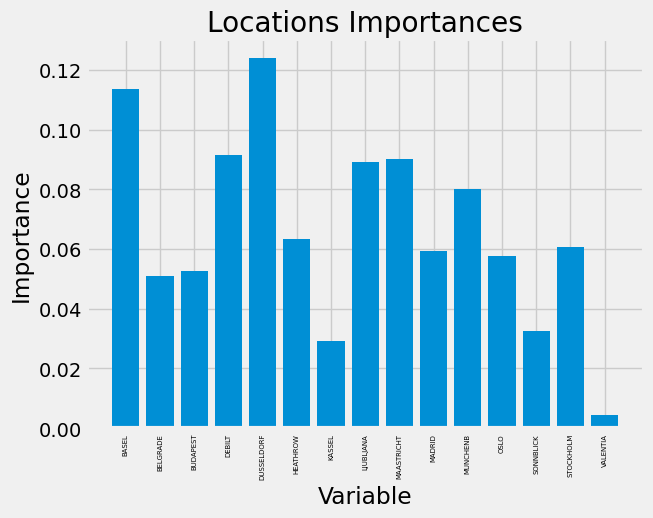

In [31]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(signals)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, locations, rotation = 'vertical', fontsize = 5)
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Locations Importances')
plt.savefig(f"{save_path}/Location_Importances2010.png")

### Most important places are:
Basel

Dusseldorf

These are followed by Ljubljana, Maastricht, and Deblit, which are of similar importance (~0.09). 

# Find the most important measures

In [32]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([4.00065203e-03, 3.68222273e-03, 3.25279285e-03, 3.65822520e-03,
       1.77712372e-02, 9.15470066e-03, 3.25111724e-02, 5.83892056e-03,
       3.36984051e-02, 4.28399006e-03, 3.47184042e-03, 4.28267331e-03,
       2.94053678e-03, 1.43382088e-02, 3.01792729e-03, 8.35691859e-03,
       3.81837634e-03, 6.35036160e-03, 3.78577350e-04, 0.00000000e+00,
       0.00000000e+00, 1.38243300e-03, 1.75186014e-02, 1.50878340e-03,
       1.20829811e-02, 3.86688766e-03, 1.59485410e-02, 3.08516190e-03,
       2.99015371e-03, 5.11958433e-03, 4.20035429e-03, 1.80289157e-02,
       4.34879037e-03, 8.19351831e-03, 3.27656949e-03, 4.24027843e-02,
       3.47116492e-03, 2.87114575e-03, 3.95300327e-03, 5.38017876e-03,
       1.90260432e-02, 6.34040762e-03, 2.64144445e-02, 4.96753240e-03,
       5.15728657e-02, 2.79887129e-03, 4.25470232e-03, 3.75818037e-03,
       4.66975516e-03, 9.61682225e-03, 4.33175416e-03, 1.44483840e-02,
       2.93170610e-03, 1.66148903e-02, 3.02475793e-03, 2.57633829e-03,
      

In [33]:
np.set_printoptions(threshold=1000)

In [34]:
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[4.00065203e-03, 3.68222273e-03, 3.25279285e-03, 3.65822520e-03,
         1.77712372e-02, 9.15470066e-03, 3.25111724e-02, 5.83892056e-03,
         3.36984051e-02],
        [4.28399006e-03, 3.47184042e-03, 4.28267331e-03, 2.94053678e-03,
         1.43382088e-02, 3.01792729e-03, 8.35691859e-03, 3.81837634e-03,
         6.35036160e-03],
        [3.78577350e-04, 0.00000000e+00, 0.00000000e+00, 1.38243300e-03,
         1.75186014e-02, 1.50878340e-03, 1.20829811e-02, 3.86688766e-03,
         1.59485410e-02],
        [3.08516190e-03, 2.99015371e-03, 5.11958433e-03, 4.20035429e-03,
         1.80289157e-02, 4.34879037e-03, 8.19351831e-03, 3.27656949e-03,
         4.24027843e-02],
        [3.47116492e-03, 2.87114575e-03, 3.95300327e-03, 5.38017876e-03,
         1.90260432e-02, 6.34040762e-03, 2.64144445e-02, 4.96753240e-03,
         5.15728657e-02],
        [2.79887129e-03, 4.25470232e-03, 3.75818037e-03, 4.66975516e-03,
         9.61682225e-03, 4.33175416e-03, 1.44483840e-02, 2.93170610

In [35]:
sumarray = np.sum(newarray[0], axis=0)
sumarray

array([0.04064655, 0.04625374, 0.04921392, 0.05984952, 0.18509865,
       0.06741007, 0.19651509, 0.05412605, 0.30088641])

In [36]:
important = pd.Series(sumarray, index = signals) #.sort_values(ascending = False)
important

cloud_cover         0.040647
humidity            0.046254
pressure            0.049214
global_radiation    0.059850
precipitation       0.185099
sunshine            0.067410
temp_mean           0.196515
temp_min            0.054126
temp_max            0.300886
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


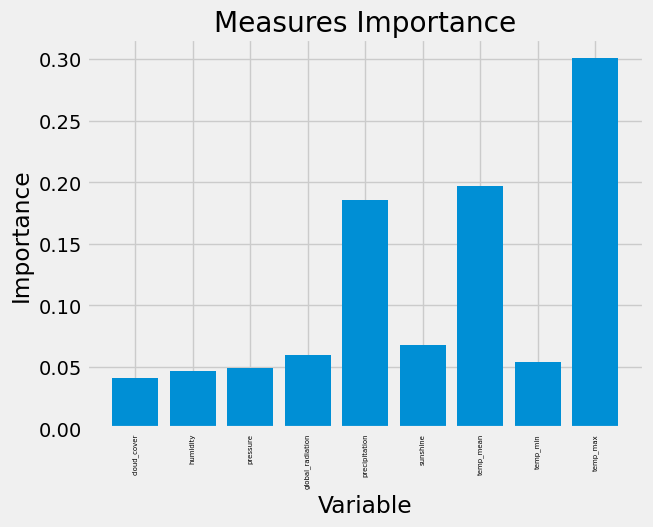

In [37]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(signals)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, signals, rotation = 'vertical', fontsize = 5)
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Measures Importance')
plt.savefig(f"{save_path}/Measure_Importances2010.png")

### The most improatnt measures are:
precipitation

temp_mean

temp_max

They are significantly more important than the other measures of 'pleasantness'.

they are also better at indicating than any of the individual locations.